## Training a neural network using PyTorch
* For this exercise, we will be using the famous MNIST dataset [5], 
* which is a sequence of images of handwritten postcode digits, zero through nine, with corresponding labels. 
* The MNIST dataset consists of 60,000 training samples and 10,000 test samples, where each sample is a grayscale image with 28 x 28 pixels. 
* PyTorch also provides the MNIST dataset under its Dataset module.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt



<img src="./MNSIT_neural_achitecture.png" >

<img src="./MNIST_NN_Left.png" >

<img src="./MNIST_NN_Right.png" >

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # 1-channel input, a 16-channel output, a kernel size of 3, and a stride of 1
        self.cn1 = nn.Conv2d(1,16,3,1)
        # 16-channel input, a 32-channel output, a kernel size of 3, and a stride of 1
        self.cn2 = nn.Conv2d(16,32,3,1)
        self.dp1 = nn.Dropout2d(0.10)
        self.dp2 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(4608,64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.cn1(x)
        x = F.relu(x)
        x = self.cn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.dp1(x)
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp2(x)
        x = self.fc2(x)
        op = F.log_softmax(x,dim=1)
        return op


### Define training and inference routines

In [13]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X,y = X.to(device), y.to(device)  # X is the image, y is the label
        optim.zero_grad()  # zero the gradient buffer
        pred_prob = model(X) # forward pass
        loss = F.nll_loss(pred_prob, y) # calculate loss between the model prediction and the ground truth

        loss.backward() # backpropagation
        optim.step() # update weights
        if b_i%10 == 0:    # prints training logs every 10 batches
            print('epoch:{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, b_i*len(X),
                len(train_dataloader.dataset),
                100.*b_i/len(train_dataloader),
                loss.item())) 

In [15]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            # l
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()

            pred = pred_prob.argmax(dim=1, keepdim=True)
            success += pred.eq(y.view_as(pred)).sum().item()
    loss /= len(test_dataloader.dataset)
    print('\nTest dataset: Overall Loss: {:.4f}, \
          Overall Accuracy: {}/{} ({:.0f}%)\n'.format(loss, 
        success, len(test_dataloader.dataset), 
        100. * success / len(test_dataloader.dataset)))

### Loading the Dataset

In [10]:
train_dataloader = DataLoader.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                  transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.1302,), (0.3069,))])),
                      batch_size=32,
                      shuffle=True)
test_dataloader = DataLoader.DataLoader(
    datasets.MNIST('../data', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,),
                                            (0.3069,))
                   ])),
    batch_size=500, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5734921.79it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 542669.15it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 700520.92it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2527601.00it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [11]:
torch.manual_seed(0)
device = torch.device("cpu")
model = ConvNet()
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

Start the training

In [16]:
for epoch in range(1,3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

epoch:1 [0/60000 (0%)]	Loss: 0.006781
epoch:1 [320/60000 (1%)]	Loss: 0.077179
epoch:1 [640/60000 (1%)]	Loss: 0.014905
epoch:1 [960/60000 (2%)]	Loss: 0.008559
epoch:1 [1280/60000 (2%)]	Loss: 0.055985
epoch:1 [1600/60000 (3%)]	Loss: 0.017430
epoch:1 [1920/60000 (3%)]	Loss: 0.089468
epoch:1 [2240/60000 (4%)]	Loss: 0.034433
epoch:1 [2560/60000 (4%)]	Loss: 0.057628
epoch:1 [2880/60000 (5%)]	Loss: 0.059608
epoch:1 [3200/60000 (5%)]	Loss: 0.029028
epoch:1 [3520/60000 (6%)]	Loss: 0.011429
epoch:1 [3840/60000 (6%)]	Loss: 0.051819
epoch:1 [4160/60000 (7%)]	Loss: 0.167144
epoch:1 [4480/60000 (7%)]	Loss: 0.034029
epoch:1 [4800/60000 (8%)]	Loss: 0.053237
epoch:1 [5120/60000 (9%)]	Loss: 0.012299
epoch:1 [5440/60000 (9%)]	Loss: 0.020151
epoch:1 [5760/60000 (10%)]	Loss: 0.016187
epoch:1 [6080/60000 (10%)]	Loss: 0.025621
epoch:1 [6400/60000 (11%)]	Loss: 0.038528
epoch:1 [6720/60000 (11%)]	Loss: 0.112390
epoch:1 [7040/60000 (12%)]	Loss: 0.040238
epoch:1 [7360/60000 (12%)]	Loss: 0.012753
epoch:1 [7680/60

Run inference on trained model

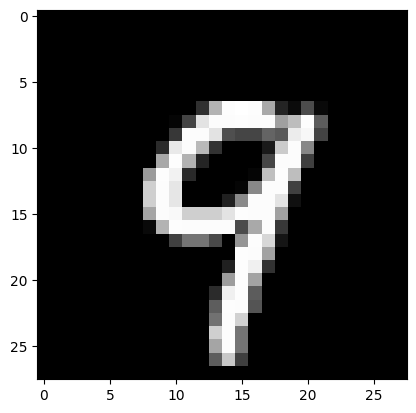

In [49]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples) 

# plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')
plt.imshow(sample_data[12][0], cmap='gray', interpolation='none')
plt.show()

In [50]:
print(f"Model prediction: {model(sample_data).data.max(1)[1][12]}")
print(f"Ground truth is : {sample_targets[12]}")

Model prediction: 9
Ground truth is : 9
